# Jupyter - Day 22 - Secion 002
# Lec 22 - Step Functions for Classification



Today we will play with the step functions again! But for classification!

In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time


# ML imports we've used previously
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm


## Loading in the data

We're going to use the `Wage` data used in the book, so note that many of your plots can be checked by looking at figures in the book.

In [2]:
df = pd.read_csv('../data/Wage.csv', index_col =0 )
df.head()

year  age      sex            maritl      race        education  \
231655  2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
86582   2004   24  1. Male  1. Never Married  1. White  4. College Grad   
161300  2003   45  1. Male        2. Married  1. White  3. Some College   
155159  2003   43  1. Male        2. Married  3. Asian  4. College Grad   
11443   2005   50  1. Male       4. Divorced  1. White       2. HS Grad   

                    region        jobclass          health health_ins  \
231655  2. Middle Atlantic   1. Industrial       1. <=Good      2. No   
86582   2. Middle Atlantic  2. Information  2. >=Very Good      2. No   
161300  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes   
155159  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes   
11443   2. Middle Atlantic  2. Information       1. <=Good     1. Yes   

         logwage        wage  
231655  4.318063   75.043154  
86582   4.255273   70.476020  
161300  4.875061  130.982177  
155159  5.041393  154.685293  
11443   4.318063   75.043154

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 231655 to 453557
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 304.7+ KB


In [4]:
df.describe()

year          age      logwage         wage
count  3000.000000  3000.000000  3000.000000  3000.000000
mean   2005.791000    42.414667     4.653905   111.703608
std       2.026167    11.542406     0.351753    41.728595
min    2003.000000    18.000000     3.000000    20.085537
25%    2004.000000    33.750000     4.447158    85.383940
50%    2006.000000    42.000000     4.653213   104.921507
75%    2008.000000    51.000000     4.857332   128.680488
max    2009.000000    80.000000     5.763128   318.342430

Here's the plot we used multiple times in class to look at a single variable:  `age` vs `wage`

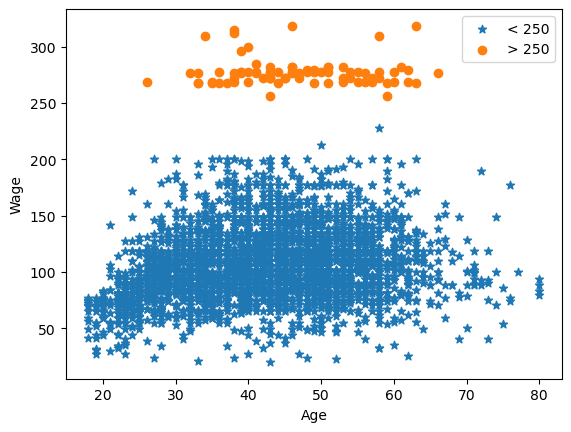

In [5]:
plt.scatter(df.age[df.wage <=250], df.wage[df.wage<=250],marker = '*', label = '< 250')
plt.scatter(df.age[df.wage >250], df.wage[df.wage>250], label = '> 250')
plt.legend()

plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

## Classification version of step functions

Now we can try out the classification version of the problem. Let's build the classifier that predicts whether a person of a given age will make more than $250,000. You already made the matrix of step function features, so we just have to hand it to `LogisticRegression` to do its thing.

&#9989; **<font color=red>Do this:</font>** 
You will need to first create the dummy variables that represent the step functions. You will need to use `pd.cut` and `pd.get_dummies`, or you can copy the relevant code from Day 21's notebook!

In [7]:
df_cut, bins = pd.cut(df.age, 4, retbins = True, right = False)
df_steps_dummies = pd.get_dummies(df_cut) # This gives us entries with true/false
df_steps = df_steps_dummies.apply(lambda x: x * 1) # This converts those to either 0 or 1.
df_steps

[18.0, 33.5)  [33.5, 49.0)  [49.0, 64.5)  [64.5, 80.062)
231655             1             0             0               0
86582              1             0             0               0
161300             0             1             0               0
155159             0             1             0               0
11443              0             0             1               0
...              ...           ...           ...             ...
376816             0             1             0               0
302281             1             0             0               0
10033              1             0             0               0
14375              1             0             0               0
453557             0             0             1               0

[3000 rows x 4 columns]

&#9989; **<font color=red>Do this:</font>** Pass the dummy variables to a logistic regression model and use it to predict the probability of `wage` being greater than 250. What is the equation for your learned model? Be specific in terms of the $C_i$ functions you learned earlier. Complete the code below.

In [9]:
from sklearn.linear_model import LogisticRegression
y = np.array(df.wage>250) #<--- this makes sure I 
                          #     just have true/false input
                          #     so that we're doing classification

# put your code below to fit a logistic regression model #
clf=LogisticRegression()
clf.fit(df_steps, y)



LogisticRegression()

If all goes well, you should be able to run the below code and plat the prediction.

In [10]:
# Build the same step features for the x-values we want to draw
t_age = pd.Series(np.linspace(20,80,100))
t_df_cut = pd.cut(t_age, bins, right = False) #<-- the `bins`` here is from the initial cut
t_dummies = pd.get_dummies(t_df_cut)
t_step = t_dummies.apply(lambda x: x * 1)

# Predict on these to get the line we can draw
f = clf.predict_proba(t_step)

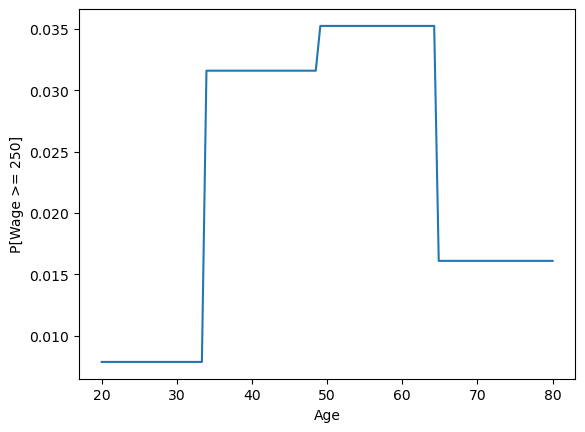

In [11]:
below = df.age[df.wage <=250]
above = df.age[df.wage >250]

# Comment this out to see the function better
# plt.scatter(above,np.ones(above.shape[0]),marker = '|', color = 'orange')
# plt.scatter(below,np.zeros(below.shape[0]),marker = '|', color = 'blue')

plt.xlabel('Age')
plt.ylabel('P[Wage >= 250]')
plt.plot(t_age,f[:,1])
plt.show()



-----
### Congratulations, we're done!
Initially created by Dr. Liz Munch, adapted by Dr. Mengsen Zhang, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.